## Neural network classification

Classification is  a problem of predicting whether something is one thing or another
(there can be Multiple things as the options)

In [5]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

torch.__version__

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [67]:
## 1. Make classification data (custom data)
from sklearn.datasets import make_circles

#Make 1000 samples
n_samples = 1000

#Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state=42)

len(X), len(y), X[:5], y[:5]

(1000,
 1000,
 array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0], dtype=int64))

In [68]:
# Make a dataframe of circle data
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [69]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

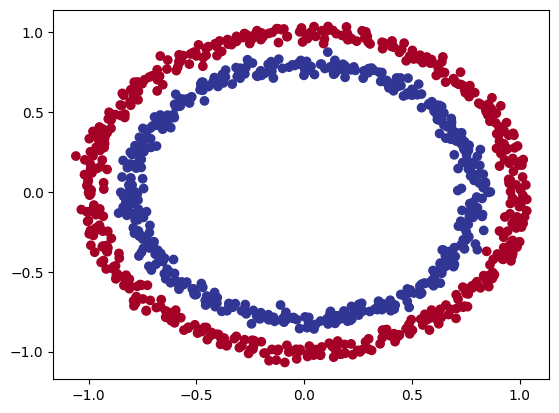

In [70]:
# Visualizatiom
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

## Check input and output shapes

In [71]:
X.shape, y.shape

((1000, 2), (1000,))

In [25]:
X_sample = X[0]
y_sample = y[0]

X_sample, y_sample, X_sample.shape, y_sample.shape

(array([0.75424625, 0.23148074]), 1, (2,), ())

# Turn data into tensors and create train  and test splits

In [72]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [73]:
#Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2, #split data into 20% test and 80%train
                                                    random_state=42, #nothing but random seed
                                                    )

In [74]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## Building a model
Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnistic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.module`)
3. pick a loss function and optim
4. create a testing and training loop

## Building a model

1. Subclass `nn.Module` (alsmost all models in Pytorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of our model
4. Instantiate an instance of our model class and send it to target device

In [30]:
# Construct a model that sunbclasses nn.module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # create 2 nn.Linear layers capable of handling the shapes of our data
        self.layer1 = nn.Linear(in_features=2,  out_features=5) # takes in 2 features and upscales to 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=5) 
        self.layer_3 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and output as single layer which is output
    
    #Define a forward() method that outlines the forward pass    
    def forward(self,x):
       return self.layer_3(self.layer_1(x)) #x - layer_1 - layer_2 - layer_3 - output
    
# Instantiate an instance of our model class and send it to taget device
model_0 = CircleModelV0().to(device)
model_0




CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=5, bias=True)
  (layer_3): Linear(in_features=5, out_features=1, bias=True)
)

In [35]:
list(model_0.parameters())

[Parameter containing:
 tensor([[-0.0298, -0.3245],
         [ 0.4191, -0.2849],
         [ 0.1908, -0.0291],
         [-0.4031,  0.4259],
         [ 0.2585, -0.3774]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([ 0.5792,  0.5555, -0.0093, -0.0957, -0.4370], device='cuda:0',
        requires_grad=True),
 Parameter containing:
 tensor([[-0.0929, -0.0105,  0.0157,  0.1907, -0.4118],
         [ 0.4142, -0.3280, -0.2047,  0.2644, -0.0455],
         [-0.4026,  0.3956, -0.0567,  0.1728, -0.2773],
         [ 0.0917,  0.2041,  0.3467,  0.1281, -0.2412],
         [-0.3023, -0.1932,  0.2045, -0.0964,  0.0367]], device='cuda:0',
        requires_grad=True),
 Parameter containing:
 tensor([ 0.3418,  0.4217, -0.3253, -0.0352, -0.0308], device='cuda:0',
        requires_grad=True),
 Parameter containing:
 tensor([[-0.4250,  0.0745, -0.1858,  0.2609, -0.3901]], device='cuda:0',
        requires_grad=True),
 Parameter containing:
 tensor([-0.2289], device='cuda:0', requires_g

In [37]:
#replicate the model using sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=5, bias=True)
  (2): Linear(in_features=5, out_features=1, bias=True)
)

In [38]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1210,  0.2164],
                      [ 0.6132,  0.3440],
                      [ 0.1985, -0.6759],
                      [ 0.2983, -0.4192],
                      [ 0.4689,  0.6538]], device='cuda:0')),
             ('0.bias',
              tensor([-0.2423, -0.2621, -0.6988,  0.4452,  0.4935], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.3440, -0.1056, -0.1584, -0.1220,  0.4196],
                      [ 0.1162, -0.0252, -0.2089,  0.3740, -0.2291],
                      [-0.3587, -0.3546,  0.3574, -0.3107, -0.4397],
                      [ 0.3227, -0.0269, -0.3158, -0.0196,  0.2055],
                      [-0.0421,  0.0070,  0.1496, -0.3348, -0.1714]], device='cuda:0')),
             ('1.bias',
              tensor([-0.4131,  0.0371,  0.4080, -0.2327, -0.3340], device='cuda:0')),
             ('2.weight',
              tensor([[ 0.0889,  0.0162, -0.1862, -0.3503, -0.2050]], device='cuda:0')),
             ('2

In [42]:
#Make predictions
with torch.inference_mode():
 untrained_preds = model_0(X_test.to(device))
 print (f"Len of preds:{len(untrained_preds)}, Shape{untrained_preds.shape}")
 print(f"Len of test samp:{X_test[:10]}, Shape: {X_test.shape}")
 print(f"\nFirst 10 preds:{untrained_preds[:10]}")
 print(f"\nFirst 10 lables: \n{y_test[:10]}")

Len of preds:200, Shapetorch.Size([200, 1])
Len of test samp:tensor([[-0.3752,  0.6827],
        [ 0.0154,  0.9600],
        [-0.7028, -0.3147],
        [-0.2853,  0.9664],
        [ 0.4024, -0.7438],
        [ 0.6323, -0.5711],
        [ 0.8561,  0.5499],
        [ 1.0034,  0.1903],
        [-0.7489, -0.2951],
        [ 0.0538,  0.9739]]), Shape: torch.Size([200, 2])

First 10 preds:tensor([[0.2728],
        [0.3234],
        [0.2142],
        [0.2892],
        [0.3316],
        [0.3615],
        [0.4109],
        [0.4201],
        [0.2094],
        [0.3281]], device='cuda:0')

First 10 lables: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## Setup loss Function and optimizer

Loss func and optim is problem specific

for example for regression might want MAE or MSE(Mean absolute error or mean squared error)

for classification (binary cross entropy or categorical cross entropy)

Loss func - measure how **wrong** model predictions are

optimizer - 2 most common useful optim are SGD and ADAM but many are available (adjust the model in correct path it goes reducing loss)

In [43]:
#setup the loss function
#loss_fn = nn.BCELoss # BCE = requires input to have gone through sigmoid before going through BCE

loss_fn = nn.BCEWithLogitsLoss() #Sigmoid activation funtion built in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.1)

In [10]:
# Calculate accuracy - out of 100 example what percentage does our model get right
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

## Train model

to train a model we are going to built a training loop:

1. Forward pass
2. calculate the loss
3. Optimizer zero grad
4. Loss backward (Backpropogation)
5. Optimizer step (Gradient Descent)

## Going from raw logit - prediction probabilities - prediction lables

our model outputs are going to be raw **logits**

we can convert these **logits** into prediction probabilites by passing them into some kind of activation function ( eg. sigmoid for binary classification and softmax for multiclass classification)

Then we can concert out model's predcition probabilities to **prediction lables** by either rounding them of taking the `argmax()`

In [46]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]

y_logits

tensor([[0.2728],
        [0.3234],
        [0.2142],
        [0.2892],
        [0.3316]], device='cuda:0')

In [47]:
# Use sigmoid activation funtion on our model logits to turn it into prediction probabilites
y_pred_probs = torch.sigmoid(y_logits)

y_pred_probs

tensor([[0.5678],
        [0.5802],
        [0.5533],
        [0.5718],
        [0.5821]], device='cuda:0')

In [48]:
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:

* `y_pred_probs` >= 0.5, y = 1 (class 1)
* `y_pred_probs` < 0.5 y = 0 (class 0)

In [49]:
# Find predicted lables
y_preds = torch.round(y_pred_probs)

# In Full (logits - pred probs - pred lables)
y_pred_lables =  torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_lables.squeeze()))

#Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

### Building a Training and test loop

In [54]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set the no of epochs
epochs = 100

#put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range (epochs):
    # Training
    model_0.train()

    #Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits - pred probs - pred labels

    #Calculate loss/accuracy
    #loss = loss_fn(torch.sigmoid(y_logits), ## expects prediction probabilites as input
    #              y_train)
    loss = loss_fn(y_logits, # expects raw logits as input
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred = y_pred)
    
    #Optimizer zero grad
    optimizer.zero_grad()
    
    #Loss backward (back propogation)
    loss.backward()

    #Optimizer step 
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits,))

        #calulate the test loss/acc
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true= y_test,
                               y_pred = test_pred)
        
        #Print out what's happening
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Loss: {loss: .5f}, Acc: {acc: .2f}% | Test loss: {test_loss: .5f} | Test_acc: {test_acc: .2f}%")

Epoch: 0 | Loss:  0.70264, Acc:  50.00% | Test loss:  0.70391 | Test_acc:  50.00%
Epoch: 10 | Loss:  0.69680, Acc:  50.00% | Test loss:  0.69850 | Test_acc:  50.00%
Epoch: 20 | Loss:  0.69463, Acc:  52.50% | Test loss:  0.69647 | Test_acc:  54.50%
Epoch: 30 | Loss:  0.69380, Acc:  54.00% | Test loss:  0.69569 | Test_acc:  49.00%
Epoch: 40 | Loss:  0.69348, Acc:  52.25% | Test loss:  0.69538 | Test_acc:  48.50%
Epoch: 50 | Loss:  0.69335, Acc:  51.62% | Test loss:  0.69525 | Test_acc:  48.00%
Epoch: 60 | Loss:  0.69329, Acc:  50.88% | Test loss:  0.69519 | Test_acc:  47.50%
Epoch: 70 | Loss:  0.69326, Acc:  51.38% | Test loss:  0.69516 | Test_acc:  48.50%
Epoch: 80 | Loss:  0.69324, Acc:  51.00% | Test loss:  0.69514 | Test_acc:  48.00%
Epoch: 90 | Loss:  0.69323, Acc:  50.88% | Test loss:  0.69513 | Test_acc:  48.50%


## Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything

So to inspect it let's make some predictions and make them visual

To do so we're going to import a function called `plot.decision_boundary()`

In [56]:
import requests
from pathlib import Path

# Download helper function from Learn pytorch repo (if it's not already downloaded)
if Path("helper_function.py").is_file():
    print("helper_function.py already exists")
else:
    print("Downloading helper_function.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

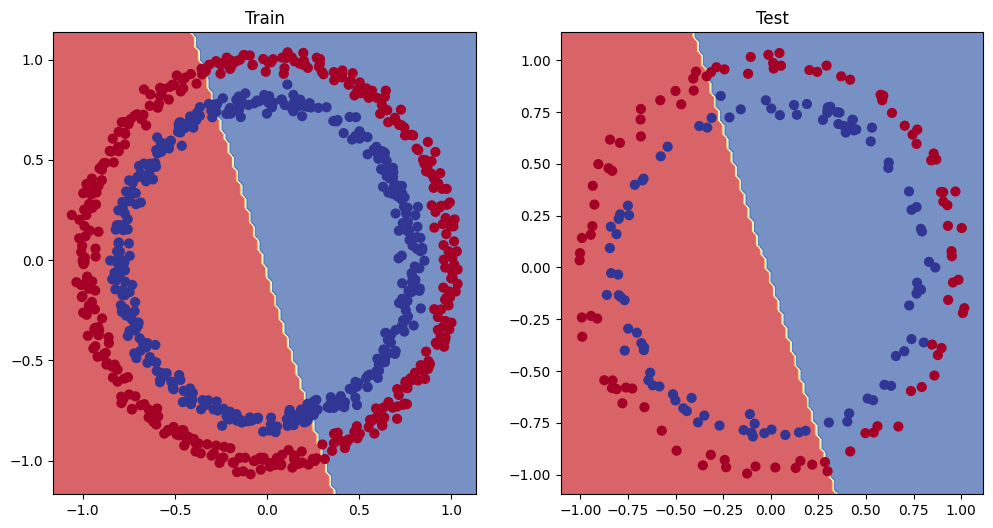

In [57]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

## Improving a model (from a model perspective)
* Add more layers give the model more chanes to learn patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* change the learning rate
* Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we can change as they referred to as **hyperparameter**.

In [65]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features= 16)
        self.layer_2 = nn.Linear(in_features=16, out_features=32)
        self.layer_3 = nn.Linear(in_features=32, out_features= 32)
        self.layer_4 = nn.Linear(in_features=32, out_features=16)
        self.layer_5 = nn.Linear(in_features=16, out_features=1)

    def forward(self,x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # z = self.layer_4(z)
        # z = self.layer_5(z)
        return self.layer_5(self.layer_4(self.layer_3(self.layer_2(self.layer_1(x)))))
    
model_1 = CircleModelV1().to(device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=32, bias=True)
  (layer_3): Linear(in_features=32, out_features=32, bias=True)
  (layer_4): Linear(in_features=32, out_features=16, bias=True)
  (layer_5): Linear(in_features=16, out_features=1, bias=True)
)

In [66]:
# create a loss function 
loss_fn = nn.BCEWithLogitsLoss() #Sigmoid activation funtion built in

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.1)

In [75]:
# write a traning and evaluation loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Train for longer
epochs = 500

#put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range (epochs):
    ## training
    model_1.train()

    ## Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits to predcition probabitlites to prediction labels

    ## Calculate the loss/acc
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    ## optimizer zero grad
    optimizer.zero_grad()

    ## Loss backward(backpropogation)
    loss.backward()

    ## Optimizer step (gradient descent)
    optimizer.step()

    ## Testing
    model_1.eval()
    with torch.inference_mode():
        # Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # Calculate the loss
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true = y_test,
                               y_pred = test_pred)
    
     #Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss: .5f}, Acc: {acc: .2f}% | Test loss: {test_loss: .5f} | Test_acc: {test_acc: .2f}%")

Epoch: 0 | Loss:  0.69340, Acc:  50.00% | Test loss:  0.69375 | Test_acc:  50.00%
Epoch: 10 | Loss:  0.69321, Acc:  58.38% | Test loss:  0.69364 | Test_acc:  55.00%
Epoch: 20 | Loss:  0.69313, Acc:  52.38% | Test loss:  0.69364 | Test_acc:  51.00%
Epoch: 30 | Loss:  0.69310, Acc:  51.62% | Test loss:  0.69366 | Test_acc:  48.00%
Epoch: 40 | Loss:  0.69307, Acc:  51.12% | Test loss:  0.69370 | Test_acc:  49.50%
Epoch: 50 | Loss:  0.69306, Acc:  51.12% | Test loss:  0.69374 | Test_acc:  48.00%
Epoch: 60 | Loss:  0.69305, Acc:  50.88% | Test loss:  0.69378 | Test_acc:  47.00%
Epoch: 70 | Loss:  0.69304, Acc:  51.12% | Test loss:  0.69382 | Test_acc:  47.50%
Epoch: 80 | Loss:  0.69303, Acc:  51.38% | Test loss:  0.69386 | Test_acc:  47.00%
Epoch: 90 | Loss:  0.69303, Acc:  50.62% | Test loss:  0.69390 | Test_acc:  45.50%
Epoch: 100 | Loss:  0.69302, Acc:  50.75% | Test loss:  0.69393 | Test_acc:  47.50%
Epoch: 110 | Loss:  0.69302, Acc:  50.88% | Test loss:  0.69397 | Test_acc:  46.50%
Epo

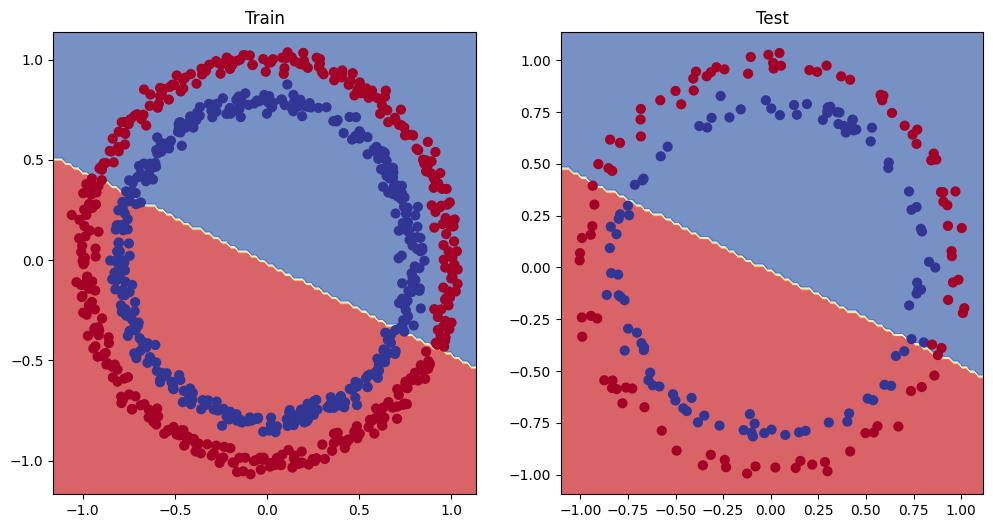

In [76]:
# Plot the decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

## preparing data to see if our model can fit a straight line
One way to trouble shoot a larger problem is to test out a samller problem


In [91]:
# Create some data 
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias #Linear regression formula

# Check the data
print(len(X_regression))



100


In [92]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))

X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]


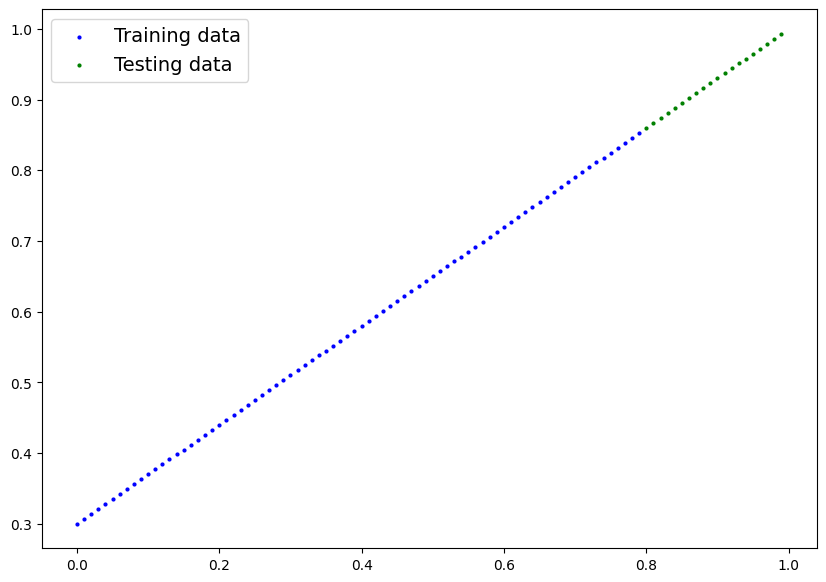

In [93]:
plot_predictions(train_data=X_train_regression,
                 train_labels = y_train_regression,
                 test_data = X_test_regression,
                 test_labels = y_test_regression);


## Adjust model_1 to fit a straight line

In [94]:
# same architecture as model_1 (using nn.sequential())

model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [95]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [96]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Epochs
epochs = 1000

# Put the data on target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Train
for epoch in range(epochs):
    #Trainig
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)
    #Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss: .5f} | Test loss: {test_loss: .5f}")       


Epoch: 0 | Loss:  0.75986 | Test loss:  0.91103
Epoch: 10 | Loss:  0.40240 | Test loss:  0.50474
Epoch: 20 | Loss:  0.06007 | Test loss:  0.10151
Epoch: 30 | Loss:  0.01559 | Test loss:  0.03231
Epoch: 40 | Loss:  0.03092 | Test loss:  0.00111
Epoch: 50 | Loss:  0.03196 | Test loss:  0.00108
Epoch: 60 | Loss:  0.03192 | Test loss:  0.00170
Epoch: 70 | Loss:  0.03081 | Test loss:  0.00097
Epoch: 80 | Loss:  0.03077 | Test loss:  0.00150
Epoch: 90 | Loss:  0.02967 | Test loss:  0.00092
Epoch: 100 | Loss:  0.02858 | Test loss:  0.00081
Epoch: 110 | Loss:  0.02962 | Test loss:  0.00197
Epoch: 120 | Loss:  0.02748 | Test loss:  0.00091
Epoch: 130 | Loss:  0.02852 | Test loss:  0.00181
Epoch: 140 | Loss:  0.02850 | Test loss:  0.00246
Epoch: 150 | Loss:  0.02744 | Test loss:  0.00169
Epoch: 160 | Loss:  0.02638 | Test loss:  0.00123
Epoch: 170 | Loss:  0.02637 | Test loss:  0.00162
Epoch: 180 | Loss:  0.02532 | Test loss:  0.00125
Epoch: 190 | Loss:  0.02636 | Test loss:  0.00284
Epoch: 200 

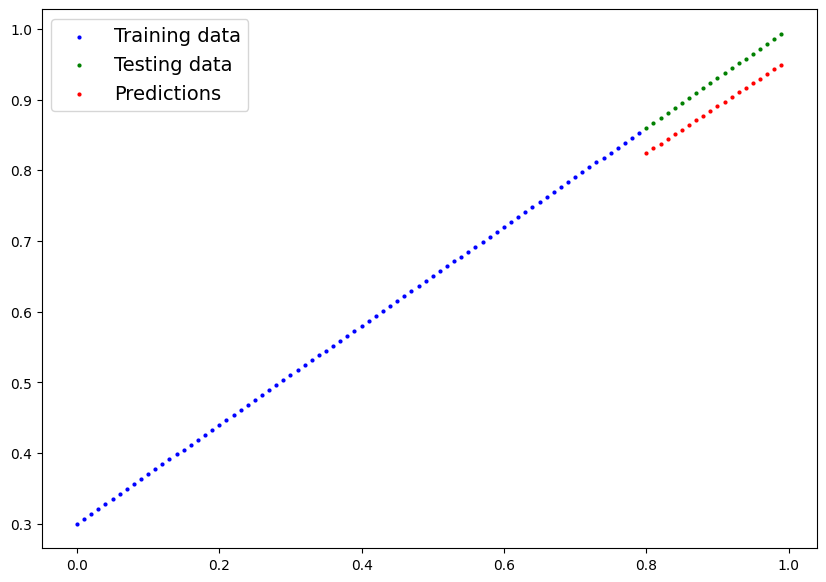

In [104]:
# Turn on evaluation mode
model_2.eval()

#Make predictions
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

#Plot data and predictions
plot_predictions (train_data = X_train_regression.cpu(),
                    train_labels = y_train_regression.cpu(),
                    test_data = X_test_regression.cpu(),
                    test_labels = y_test_regression.cpu(),
                    predictions = y_preds.cpu());

## The missing piece non-linearity

parameters, given infinite amount of a straight and non-straight lines

or in machine learning terms, an infinite (but really it is finite) of linear and non-linear functions?

## Recreating non-linear data (red and blue circles)

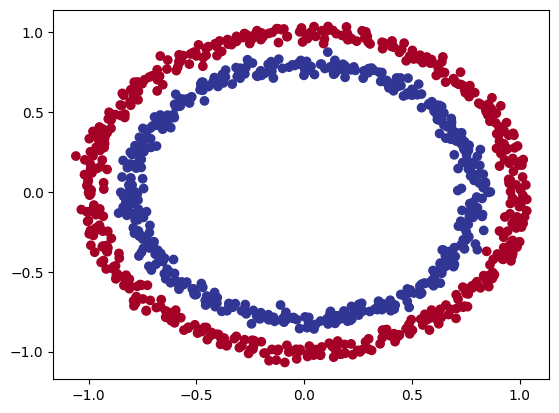

In [15]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state=42)

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [16]:
# Convert data to tensors and then to train and test splits
import torch 
from sklearn.model_selection import train_test_split

#Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state = 42)

## Building model with non-linearity


In [17]:
# Build a model with non linear activation functions
from torch import nn

class CirclemodelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10,out_features=1)
        self.relu = nn.ReLU()

    def forward(self,x):
        #Where should we put our non-linear activation function(ReLu)
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    
model_3 = CirclemodelV2().to(device)
model_3

CirclemodelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [18]:
# Setup loss and optim
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model_3.parameters(),
                            lr = 0.1)


In [19]:
len(X_test), len(y_test)

(200, 200)

## Training a model with non-Linearity

In [20]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Put all data on target device
X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

#Loop throught the data
epochs = 1000

for epoch in range(epochs):
    ## Training
    model_3.train()

    #Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # calculate the loss
    loss = loss_fn(y_logits, y_train) #BCEwithlogitsloss
    acc = accuracy_fn(y_true = y_train,
                      y_pred = y_pred)
    
    #Optimizer zero grad
    optimizer.zero_grad()

    #backward
    loss.backward()

    #step
    optimizer.step()

    ## Testing
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn (y_true = y_test,
                                y_pred = test_pred)
        
     #Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss: .5f}, Acc: {acc: .2f}% | Test loss: {test_loss: .5f} | Test_acc: {test_acc: .2f}%")



Epoch: 0 | Loss:  0.69295, Acc:  50.00% | Test loss:  0.69319 | Test_acc:  50.00%
Epoch: 100 | Loss:  0.69115, Acc:  52.88% | Test loss:  0.69102 | Test_acc:  52.50%
Epoch: 200 | Loss:  0.68977, Acc:  53.37% | Test loss:  0.68940 | Test_acc:  55.00%
Epoch: 300 | Loss:  0.68795, Acc:  53.00% | Test loss:  0.68723 | Test_acc:  56.00%
Epoch: 400 | Loss:  0.68517, Acc:  52.75% | Test loss:  0.68411 | Test_acc:  56.50%
Epoch: 500 | Loss:  0.68102, Acc:  52.75% | Test loss:  0.67941 | Test_acc:  56.50%
Epoch: 600 | Loss:  0.67515, Acc:  54.50% | Test loss:  0.67285 | Test_acc:  56.00%
Epoch: 700 | Loss:  0.66659, Acc:  58.38% | Test loss:  0.66322 | Test_acc:  59.00%
Epoch: 800 | Loss:  0.65160, Acc:  64.00% | Test loss:  0.64757 | Test_acc:  67.50%
Epoch: 900 | Loss:  0.62362, Acc:  74.00% | Test loss:  0.62145 | Test_acc:  79.00%


## Evaluating a model trained with non-linear activation funtions


In [21]:
# Make preditions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

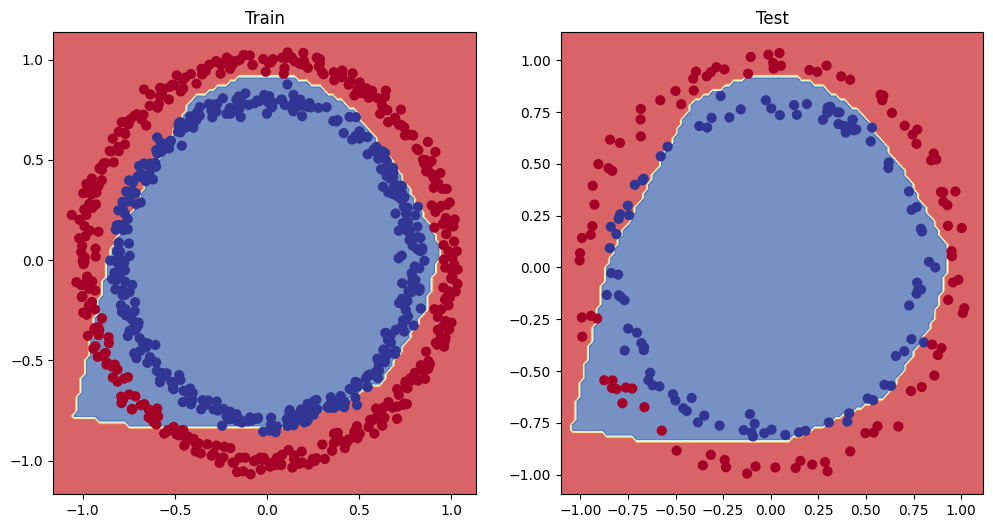

In [23]:
# Plot the decision boundaries
from helper_functions import plot_predictions, plot_decision_boundary

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test,y_test)

## Creating a toy Multi-class dataset


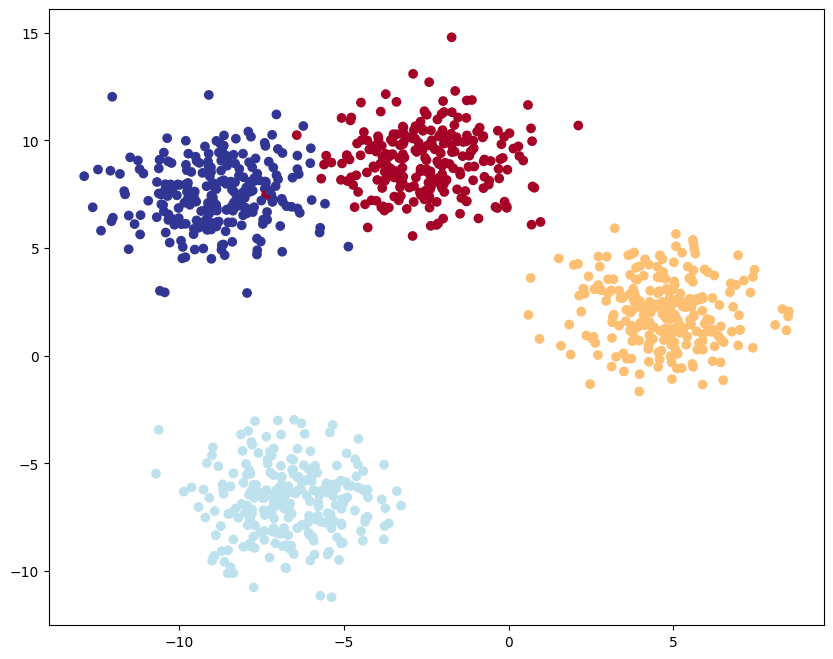

In [26]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#Create multiclass data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5, # Give the clusters a little shake up
                            random_state= RANDOM_SEED)

#Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

#Train and test split
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size = 0.2,
                                                                        random_state = RANDOM_SEED)

#Plot data (Visualize)
plt.figure(figsize=(10,8))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);